# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html

soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Using pandas to extract table and convert to dataframe
df = pd.read_html(url)

mars_df_pd = df[0]

mars_df_pd

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
# Using Beautiful Soup Extract all rows of data
table = soup.find('table', class_='table')
rows = soup.find_all('tr', class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Creating list of headers
table_headers = table.find_all("th")
column_headers = [header.text for header in table_headers]

# Create an empty list
mars_list = []

# Loop through the scraped data to create a list of rows
for row in rows:
    row_data = [cell.get_text() for cell in row.find_all('td')]
    mars_list.append(row_data)

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_list, columns=column_headers)


In [11]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis
mars_df = mars_df.astype({
    'id': object,
    'terrestrial_date':'datetime64[ns]',
    'sol':'int64',
    'ls':'int64',
    'month':'int64',
    'min_temp': 'float64',
    'pressure': 'float64'
})

In [14]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
distinct_months = mars_df['month'].nunique()

print("Distinct number of months on Mars:", distinct_months)

Distinct number of months on Mars: 12


In [16]:
# 2. How many Martian days' worth of data are there?
distinct_days = mars_df['terrestrial_date'].nunique()

print("Distinct number of days in dataset:", distinct_days)

Distinct number of days in dataset: 1867


In [17]:
# 3. What is the average low temperature by month?
average_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean().round(2)
average_min_temp_by_month

month
1    -77.16
2    -79.93
3    -83.31
4    -82.75
5    -79.31
6    -75.30
7    -72.28
8    -68.38
9    -69.17
10   -71.98
11   -71.99
12   -74.45
Name: min_temp, dtype: float64

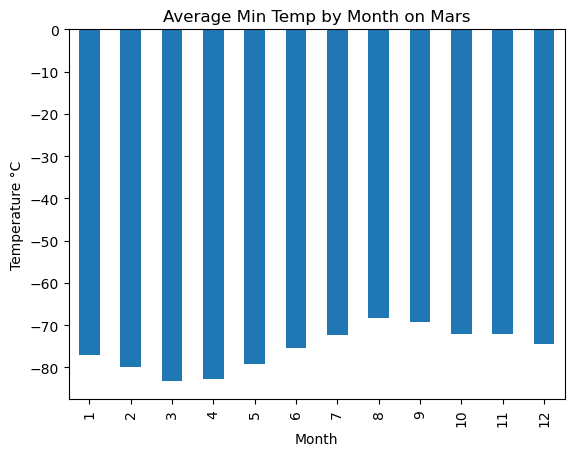

In [18]:
# Plot the average temperature by month
average_min_temp_by_month.plot(kind='bar')
plt.title('Average Min Temp by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature °C')
plt.show()

In [19]:
average_min_temp_by_month_sorted = average_min_temp_by_month.sort_values()
average_min_temp_by_month_sorted

month
3    -83.31
4    -82.75
2    -79.93
5    -79.31
1    -77.16
6    -75.30
12   -74.45
7    -72.28
11   -71.99
10   -71.98
9    -69.17
8    -68.38
Name: min_temp, dtype: float64

The coldest month on average is 3 with a temperature of -83.31 °C
The hottest month on average is 8 with a temperature of -68.38 °C


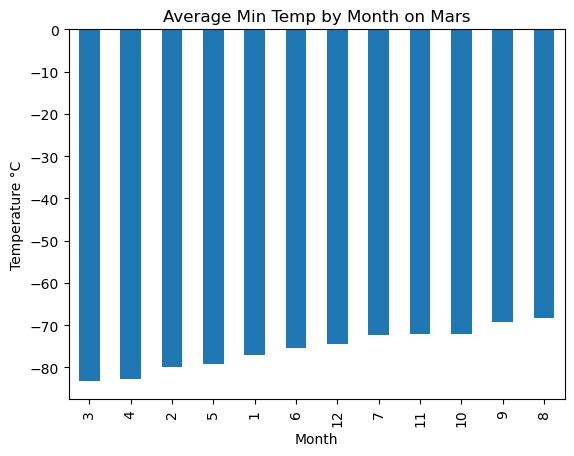

In [20]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = average_min_temp_by_month_sorted.idxmin()
coldest_temp = mars_df.groupby('month')['min_temp'].mean().min()
coldest_temp_rounded = round(coldest_temp,2)

hottest_month = average_min_temp_by_month_sorted.idxmax()
hottest_temp = mars_df.groupby('month')['min_temp'].mean().max()
hottest_temp_rounded = round(hottest_temp,2)

print(f"The coldest month on average is {coldest_month} with a temperature of {coldest_temp_rounded} °C")
print(f"The hottest month on average is {hottest_month} with a temperature of {hottest_temp_rounded} °C")

average_min_temp_by_month_sorted.plot(kind='bar')
plt.title('Average Min Temp by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature °C')
plt.show()

In [21]:
# 4. Average pressure by Martian month
average_pressure_by_month = mars_df.groupby('month')['pressure'].mean().round(2)
average_pressure_by_month

month
1     862.49
2     889.46
3     877.32
4     806.33
5     748.56
6     745.05
7     795.11
8     873.83
9     913.31
10    887.31
11    857.01
12    842.16
Name: pressure, dtype: float64

The month with the lowest on average atmospheric pressure is 6 with a value of 745.05
The month with the highest on average atmospheric pressure is 9 with a value of 913.31


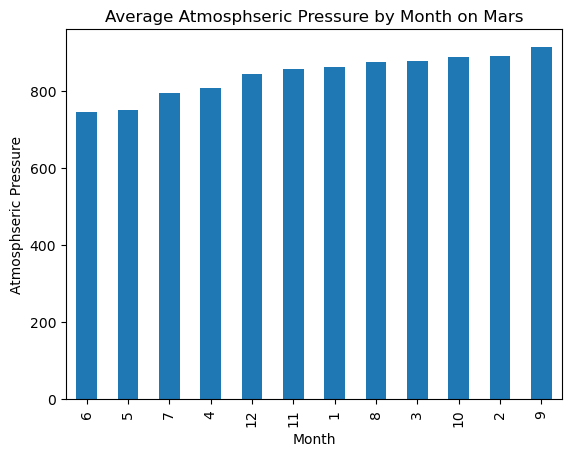

In [22]:
# Plot the average pressure by month
average_pressure_by_month_sorted = average_pressure_by_month.sort_values()

highest_pressure_month = average_pressure_by_month_sorted.idxmax()
highest_pressure = mars_df.groupby('month')['pressure'].mean().max()
highest_pressure_rounded = round(highest_pressure,2)

lowest_pressure_month = average_pressure_by_month_sorted.idxmin()
lowest_pressure = mars_df.groupby('month')['pressure'].mean().min()
lowest_pressure_rounded = round(lowest_pressure,2)

print(f"The month with the lowest on average atmospheric pressure is {lowest_pressure_month} with a value of {lowest_pressure_rounded}")
print(f"The month with the highest on average atmospheric pressure is {highest_pressure_month} with a value of {highest_pressure_rounded}")

average_pressure_by_month_sorted.plot(kind='bar')
plt.title('Average Atmosphseric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Atmosphseric Pressure')
plt.show()

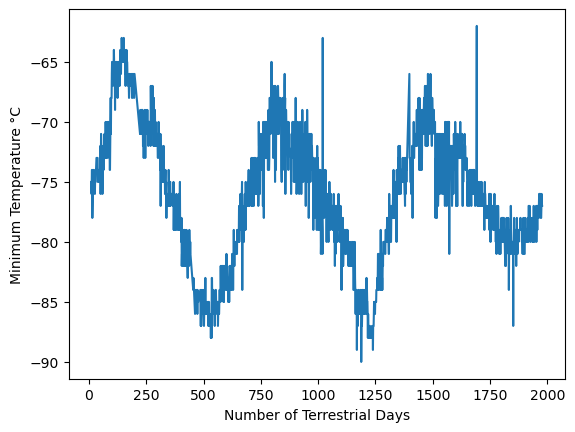

In [23]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(mars_df['sol'], mars_df['min_temp'])
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature °C')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
mars_df.to_csv('mars_weather',  encoding='utf8', index=False , )

In [25]:
browser.quit()